In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# consumo-total-nacional
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import math
from shapely.geometry import Point
from pyproj import CRS

In [3]:
drive.mount('/content/drive')
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/consumo-total-nacional.parquet')
df['datahora'] = pd.to_datetime(df['datahora'])
shapefile = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/tese/cont-aad-caop2017/Cont_AAD_CAOP2017.shp")

Mounted at /content/drive


In [4]:
df['datahora'] = pd.to_datetime(df['datahora'])
daily_totals = df.resample('D', on='datahora')['total'].sum()

In [5]:
df

datahora dia mes   ano        date   time  \
0     2023-01-29 06:30:00+00:00  29  01  2023  2023-01-29  06:30   
1     2023-01-29 12:45:00+00:00  29  01  2023  2023-01-29  12:45   
2     2023-01-29 19:30:00+00:00  29  01  2023  2023-01-29  19:30   
3     2023-01-30 10:30:00+00:00  30  01  2023  2023-01-30  10:30   
4     2023-01-30 12:00:00+00:00  30  01  2023  2023-01-30  12:00   
...                         ...  ..  ..   ...         ...    ...   
81316 2025-04-17 20:00:00+01:00  17  04  2025  2025-04-17  20:00   
81317 2025-04-18 21:15:00+01:00  18  04  2025  2025-04-18  21:15   
81318 2025-04-22 13:45:00+01:00  22  04  2025  2025-04-22  13:45   
81319 2025-04-22 20:30:00+01:00  22  04  2025  2025-04-22  20:30   
81320 2025-04-26 13:15:00+01:00  26  04  2025  2025-04-26  13:15   

                 bt           mt           at         mat         total  
0      6.697477e+05  285590.1264  181088.0760  82935.3951  1.219361e+06  
1      1.042687e+06  281746.7168  176916.3597  72363.5005  1.573714e+06  
2      1.386697e+06  334359.6216  186134.7870  40438.4416  1.947630e+06  
3      1.050558e+06  639665.3602  197452.0786  80511.9226  1.968187e+06  
4      1.066586e+06  618539.7125  194695.9541  67478.1058  1.947300e+06  
...             ...          ...          ...         ...           ...  
81316  1.041222e+06  519975.0537  222157.8060  43034.3042  1.826389e+06  
81317  9.646256e+05  363819.7395  190532.3024  60615.2739  1.579593e+06  
81318  6.525736e+05  485321.7413  184771.6492  80684.0494  1.403351e+06  
81319  9.924301e+05  521040.4413  220463.5009  46074.9207  1.780009e+06  
81320  5.168712e+05  268199.6401  169624.4484  86417.7430  1.041113e+06  

[81321 rows x 11 columns]

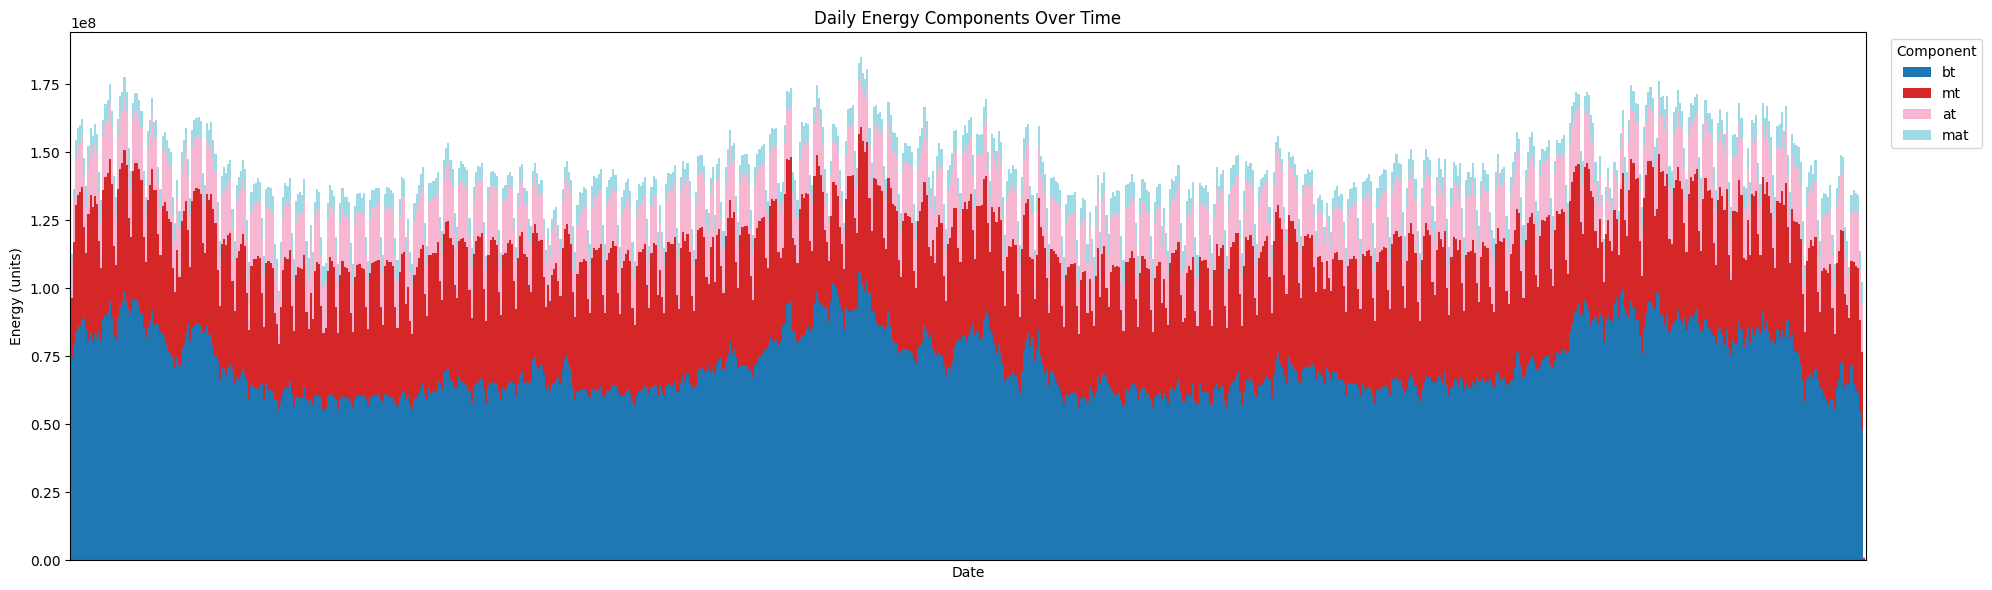

In [6]:
daily_data = df.groupby('date')[['bt', 'mt', 'at', 'mat']].sum()

# Plot
ax = daily_data.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='tab20', width=1)

plt.title('Daily Energy Components Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (units)')
plt.legend(title='Component', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks([], [])  # Optional: hide xticks if there are too many
plt.tight_layout()
plt.show()


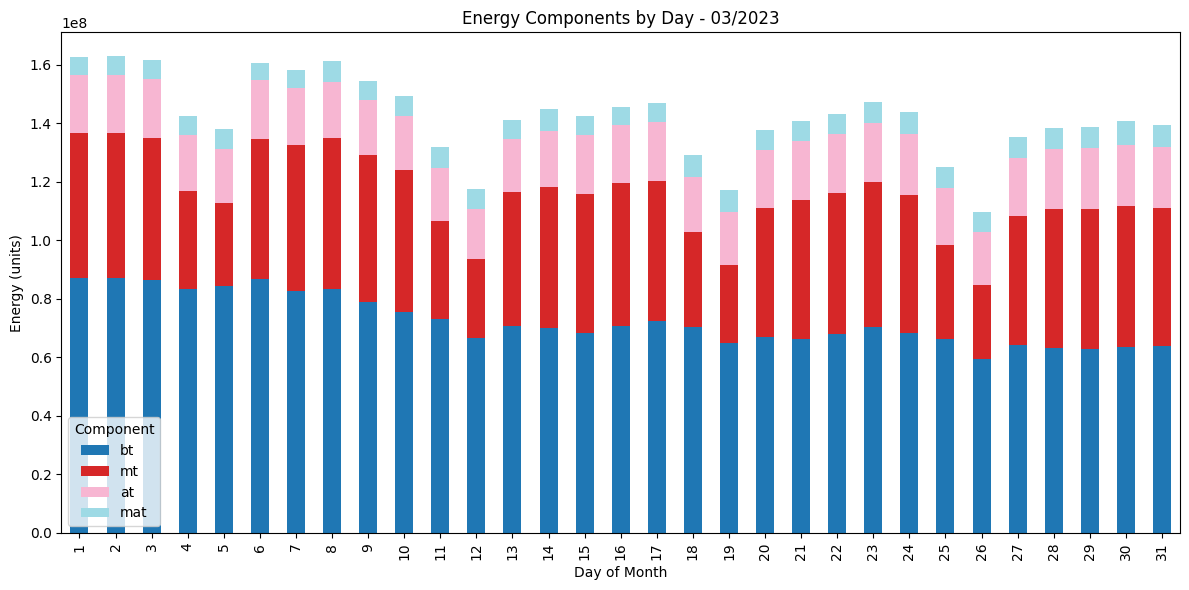

In [7]:


# Filter for a specific month and year (e.g., March 2023)
month = 3
year = 2023
df_month = df[(df['datahora'].dt.month == month) & (df['datahora'].dt.year == year)]

# Group by day and sum the values of each component
daily_data = df_month.groupby(df_month['datahora'].dt.day)[['bt', 'mt', 'at', 'mat']].sum()

# Plot
ax = daily_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title(f'Energy Components by Day - {month:02d}/{year}')
plt.xlabel('Day of Month')
plt.ylabel('Energy (units)')
plt.legend(title='Component')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2479067626.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['datahora'].dt.to_period('M')


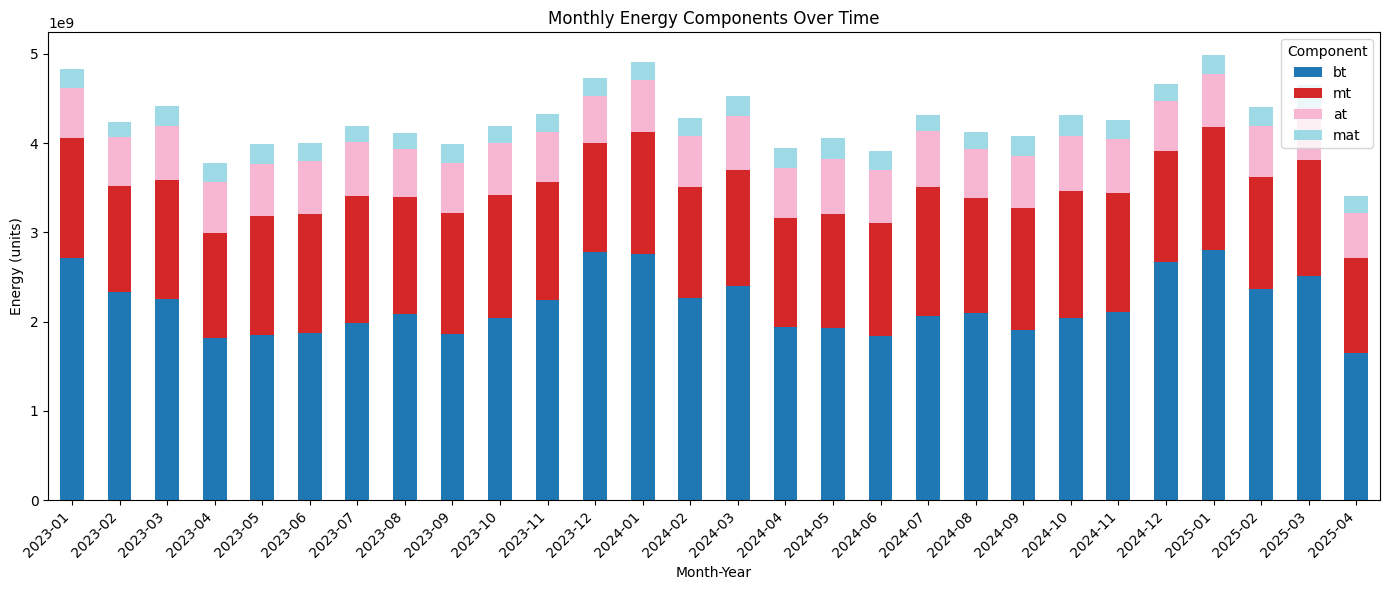

In [8]:
df['year_month'] = df['datahora'].dt.to_period('M')

# Group by month-year and sum component values
monthly_data = df.groupby('year_month')[['bt', 'mt', 'at', 'mat']].sum()

# Convert PeriodIndex to string for x-axis labeling
monthly_data.index = monthly_data.index.astype(str)

# Plot
ax = monthly_data.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')

plt.title('Monthly Energy Components Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Energy (units)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Component')
plt.tight_layout()
plt.show()


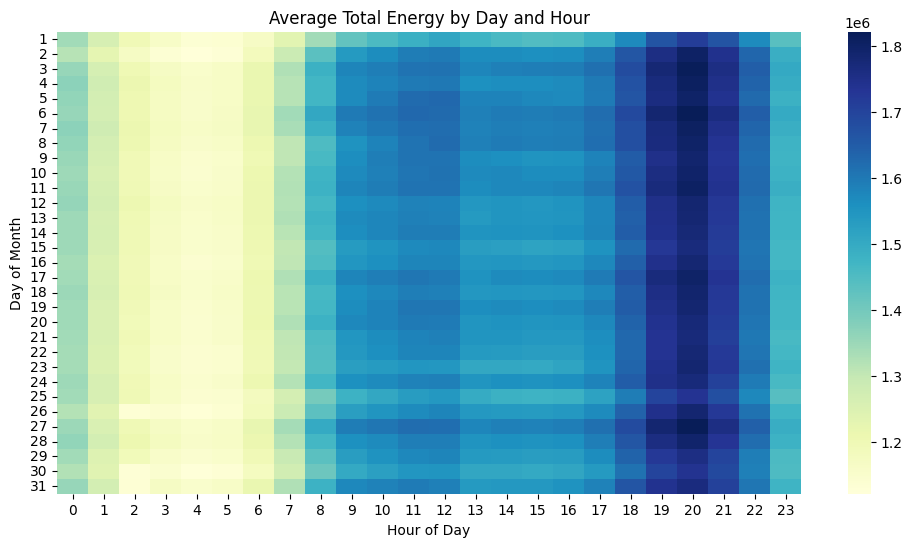

In [9]:
df['hour'] = df['datahora'].dt.hour
df['day'] = df['datahora'].dt.day

heatmap_data = df.pivot_table(index='day', columns='hour', values='total', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Average Total Energy by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Month')
plt.show()


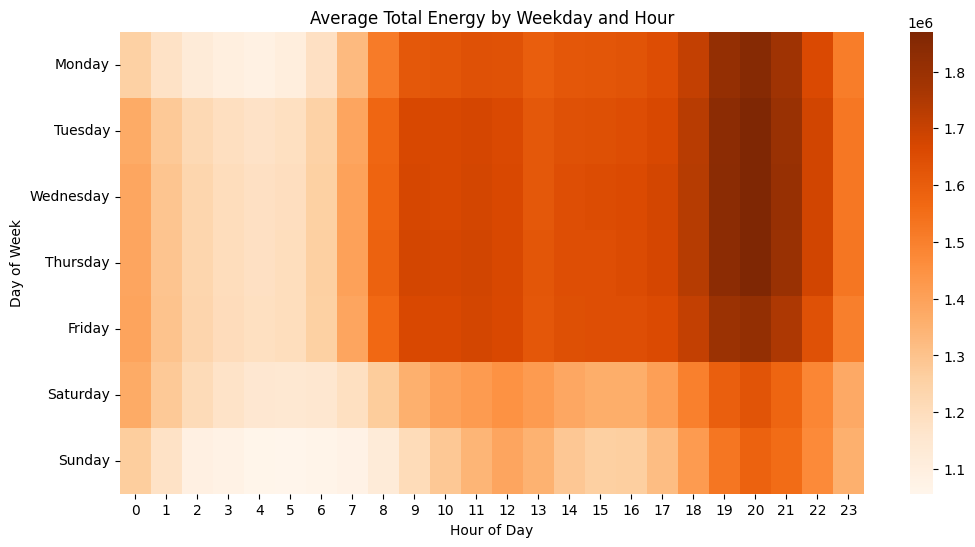

In [10]:
df['weekday'] = df['datahora'].dt.day_name()

heatmap_data = df.pivot_table(index='weekday', columns='hour', values='total', aggfunc='mean')

# Optional: order weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Oranges')
plt.title('Average Total Energy by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


# DF diferente

In [11]:
# 3-consumos-faturados-por-municipio-ultimos-10-anos
new_df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/3-consumos-faturados-por-municipio-ultimos-10-anos.parquet')

In [12]:
new_df

ano mes        data  distrito              concelho  \
0       2021  01  2021-01-01  Bragança             Mirandela   
1       2021  01  2021-01-01  Bragança             Mirandela   
2       2021  01  2021-01-01  Bragança             Mirandela   
3       2021  01  2021-01-01  Bragança             Mirandela   
4       2021  01  2021-01-01  Bragança             Mirandela   
...      ...  ..         ...       ...                   ...   
228023  2021  03  2021-03-01    Guarda  Vila Nova de Foz Côa   
228024  2021  03  2021-03-01    Guarda  Vila Nova de Foz Côa   
228025  2021  03  2021-03-01    Guarda  Vila Nova de Foz Côa   
228026  2021  03  2021-03-01    Guarda  Vila Nova de Foz Côa   
228027  2021  03  2021-03-01    Guarda  Vila Nova de Foz Côa   

               freguesia                   nivel_de_tensao  energia_ativa_kwh  \
0                  COBRO                      Baixa Tensão          23826.181   
1                FRECHAS                      Baixa Tensão         148232.197   
2       LAMAS DE ORELHAO  Muito Alta, Alta e Média Tensões          78744.900   
3                 PASSOS                      Baixa Tensão          58892.372   
4        SAO PEDRO VELHO                      Baixa Tensão          44866.840   
...                  ...                               ...                ...   
228023    CASTELO MELHOR                      Baixa Tensão          32432.249   
228024              CHAS                      Baixa Tensão          33493.029   
228025            SEIXAS                      Baixa Tensão          41435.767   
228026   FREIXO DE NUMAO  Muito Alta, Alta e Média Tensões          30232.501   
228027   FREIXO DE NUMAO                      Baixa Tensão         121133.291   

       coddistrito coddistritoconcelho coddistritoconcelhofreguesia  mes_int  
0               04                0407                       040713        1  
1               04                0407                       040716        1  
2               04                0407                       040718        1  
3               04                0407                       040724        1  
4               04                0407                       040727        1  
...            ...                 ...                          ...      ...  
228023          09                0914                       091402        3  
228024          09                0914                       091404        3  
228025          09                0914                       091415        3  
228026          09                0914                       091418        3  
228027          09                0914                       091418        3  

[228028 rows x 12 columns]

In [13]:
new_df['data'] = pd.to_datetime(new_df['data'], errors='coerce')

new_df['periodo'] = new_df['data'].dt.to_period('M')

new_df['distrito'] = new_df['distrito'].str.strip().str.title()

new_df = new_df[~new_df['distrito'].str.startswith('Outros', na=False)]

summary_df = (
    new_df.groupby(['periodo', 'distrito', 'coddistrito'])['energia_ativa_kwh']
    .sum()
    .reset_index()
)

summary_df = summary_df.sort_values(['periodo', 'distrito'])

summary_df['periodo_str'] = summary_df['periodo'].astype(str)

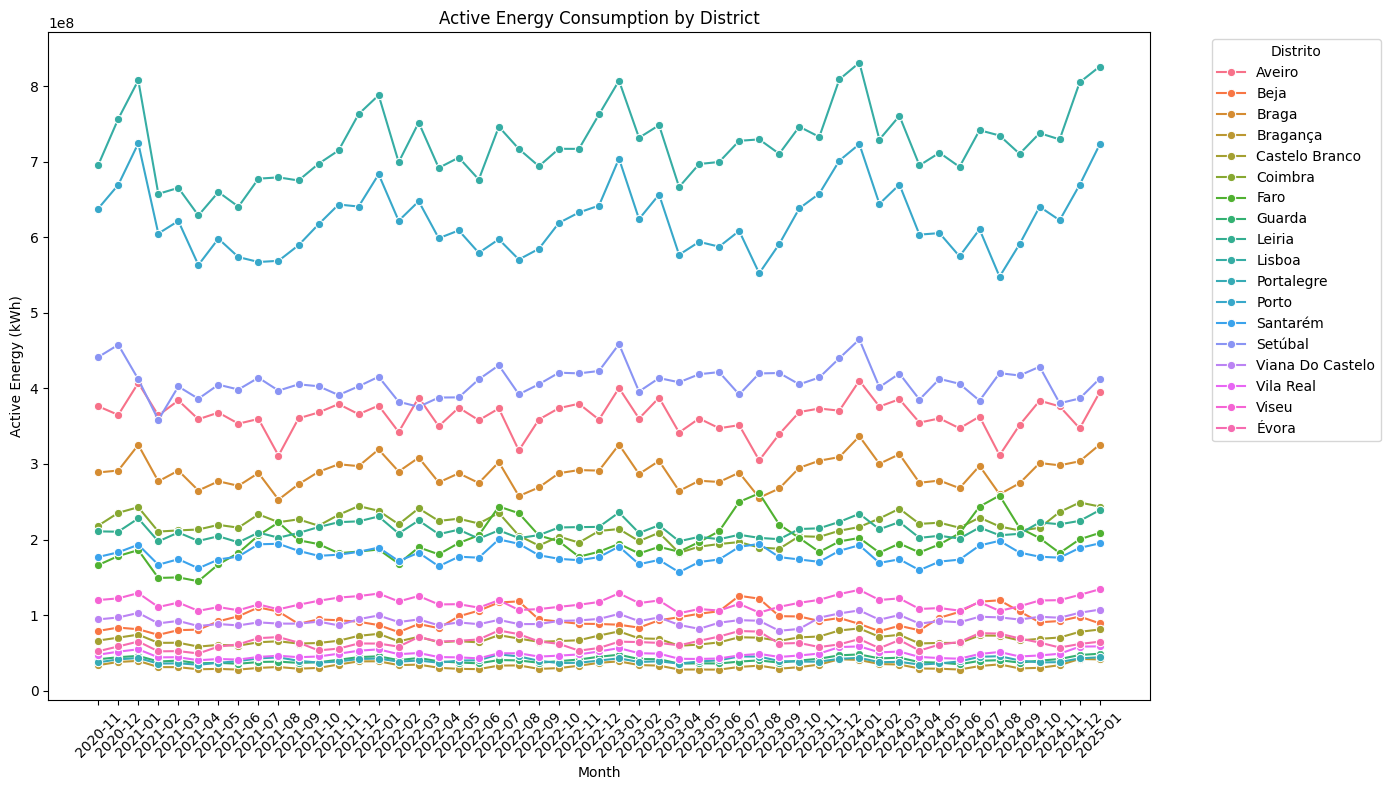

In [14]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=summary_df, x='periodo_str', y='energia_ativa_kwh', hue='distrito', marker='o')
plt.xticks(rotation=45)
plt.title('Active Energy Consumption by District')
plt.xlabel('Month')
plt.ylabel('Active Energy (kWh)')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


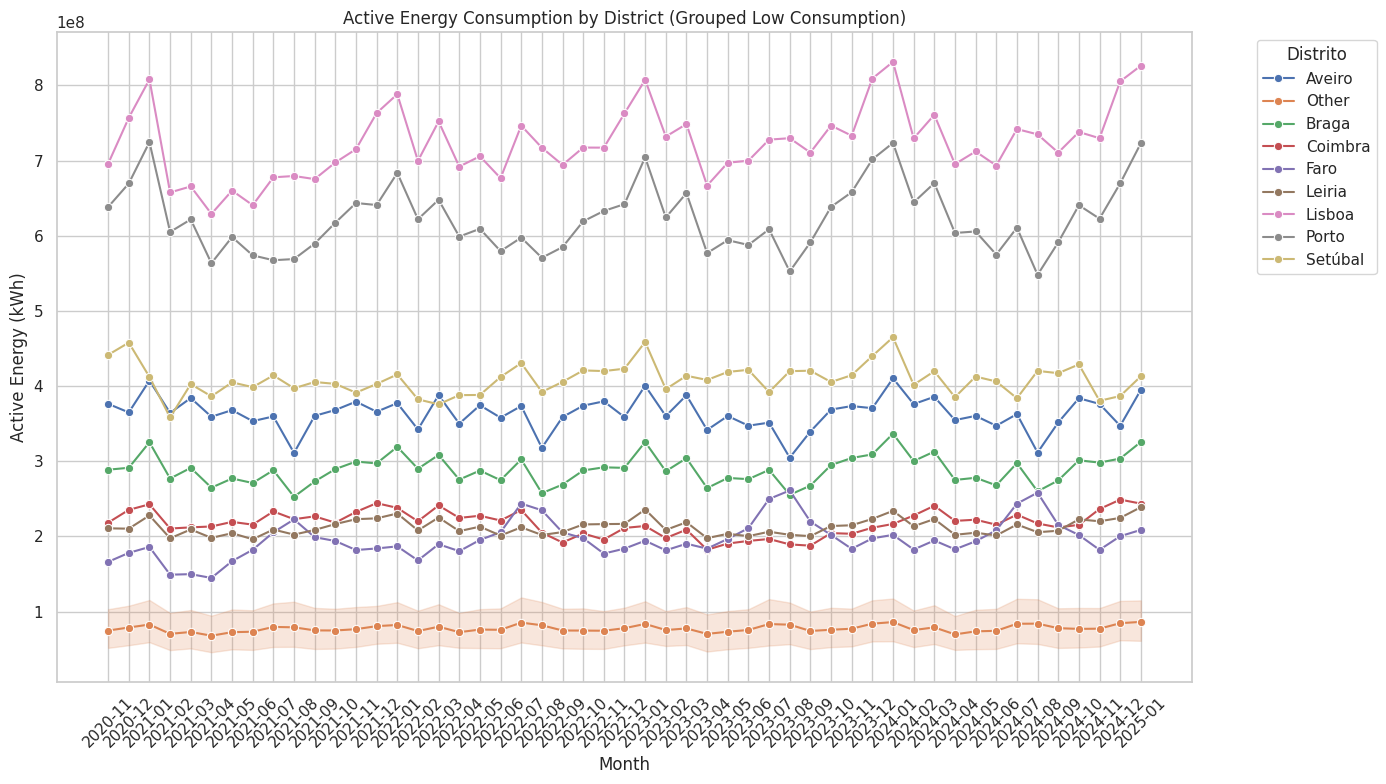

In [51]:
# Calculate the average energy consumption per district
avg_energy_per_district = summary_df.groupby('distrito')['energia_ativa_kwh'].mean().sort_values()

# Identify districts with low average consumption (e.g., the bottom 5)
low_consumption_districts = avg_energy_per_district.head(10).index.tolist()

# Replace low consumption districts with 'Other'
summary_df['distrito_grouped'] = summary_df['distrito'].apply(lambda x: 'Other' if x in low_consumption_districts else x)

plt.figure(figsize=(14, 8))
sns.lineplot(data=summary_df, x='periodo_str', y='energia_ativa_kwh', hue='distrito_grouped', marker='o')
plt.xticks(rotation=45)
plt.title('Active Energy Consumption by District (Grouped Low Consumption)')
plt.xlabel('Month')
plt.ylabel('Active Energy (kWh)')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
shapefile_distrito = shapefile.copy()
shapefile_distrito['coddistrito'] = shapefile_distrito['Dicofre'].str[:2]
dissolved_distritos = shapefile_distrito.dissolve(by='coddistrito')

In [17]:
summary_geo = summary_df.merge(dissolved_distritos.reset_index(), on='coddistrito')
gdf_summary = gpd.GeoDataFrame(summary_geo, geometry='geometry')

In [18]:
# Define trimestres based on month
def periodo_to_trimestre(p):
    return f"{p.year}T{(p.month - 1) // 3 + 1}"

gdf_summary['trimestre'] = gdf_summary['periodo'].apply(periodo_to_trimestre)

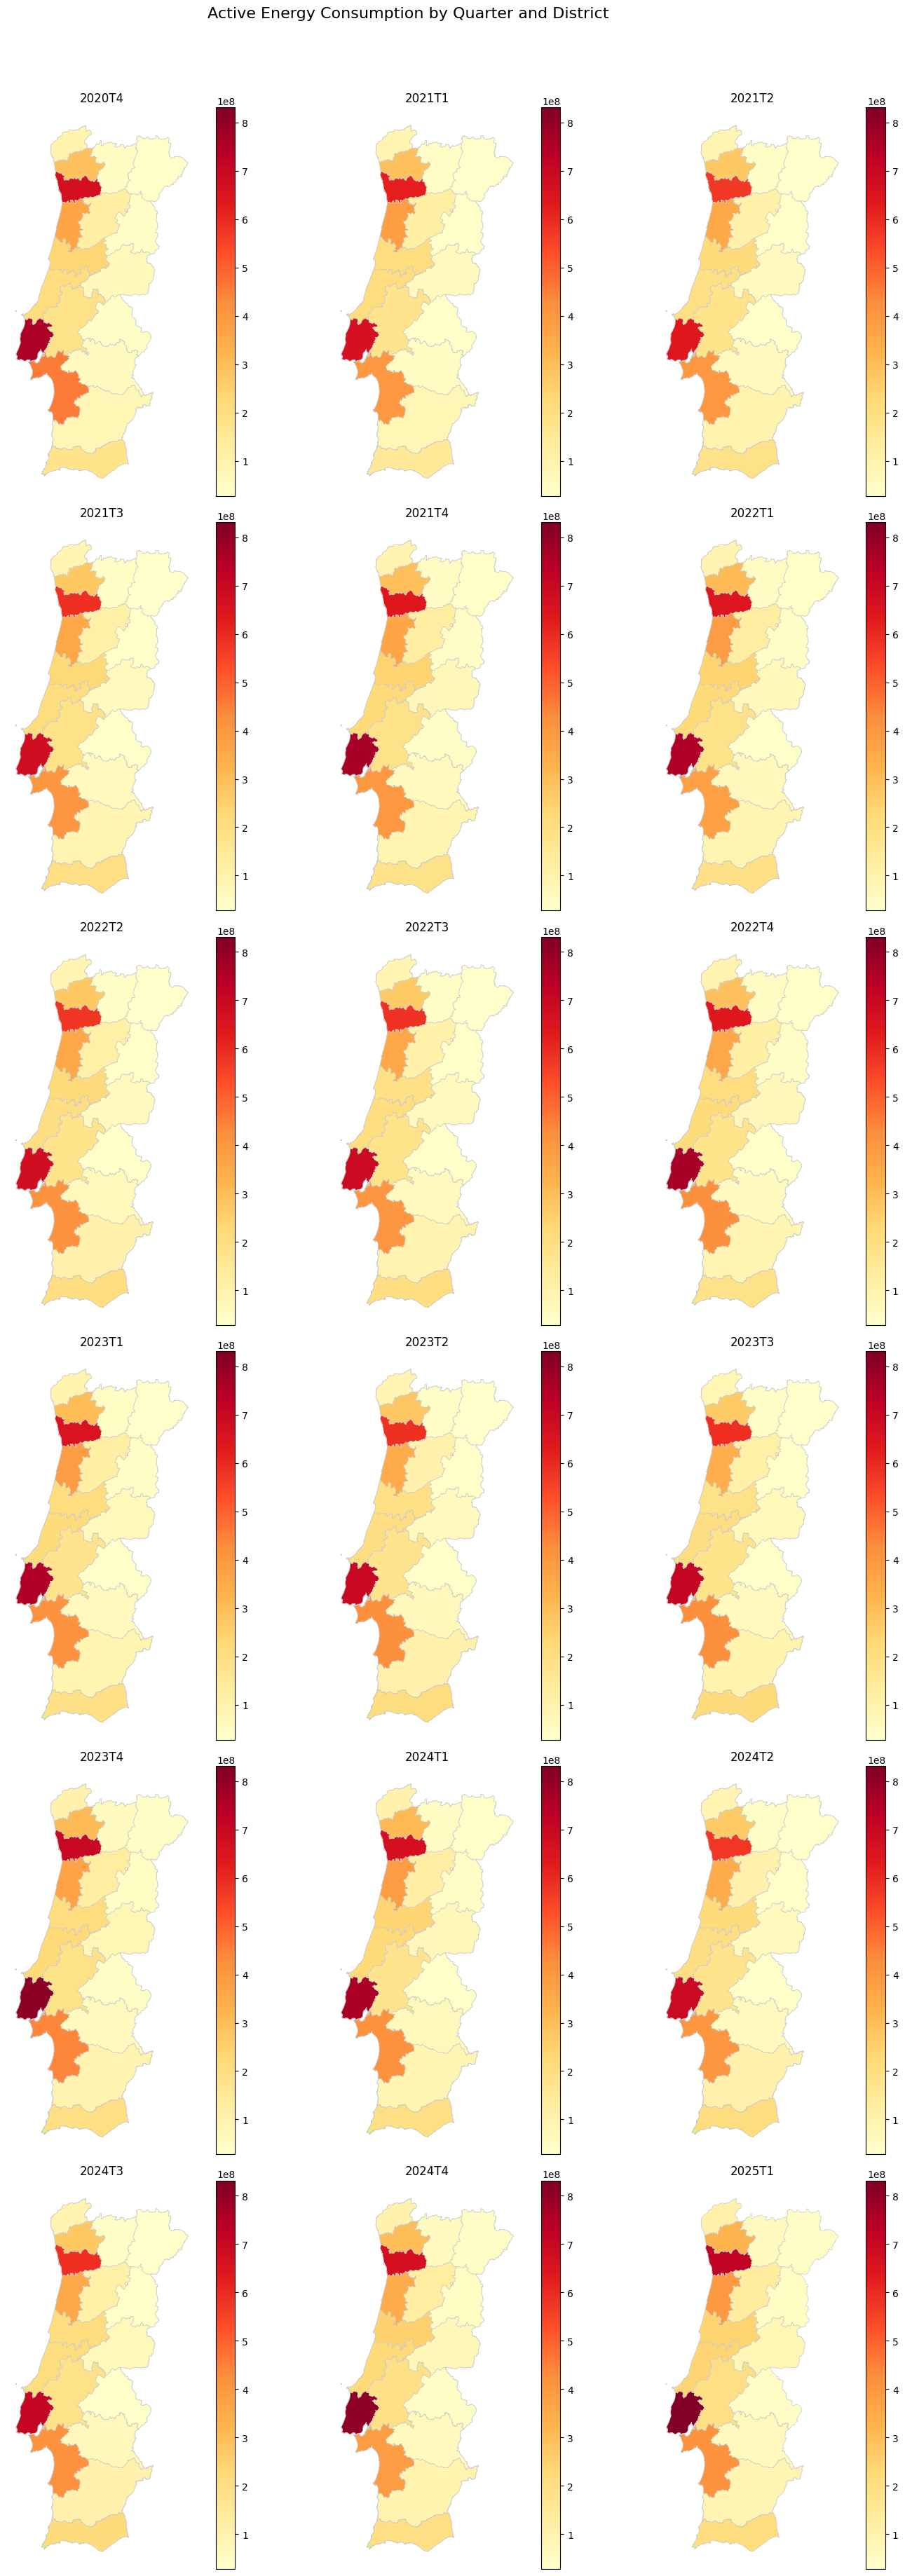

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

trimestres = sorted(gdf_summary['trimestre'].unique())
vmin = gdf_summary['energia_ativa_kwh'].min()
vmax = gdf_summary['energia_ativa_kwh'].max()

cols = 3
rows = math.ceil(len(trimestres) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 6 * rows))
axes = axes.flatten()

for i, trimestre in enumerate(trimestres):
    ax = axes[i]
    subset = gdf_summary[gdf_summary['trimestre'] == trimestre]

    plot = subset.plot(column='energia_ativa_kwh',
                       cmap='YlOrRd',
                       linewidth=0.5,
                       edgecolor='0.8',
                       legend=True,
                       ax=ax,
                       vmin=vmin,
                       vmax=vmax)
    ax.set_title(f"{trimestre}", fontsize=12)
    ax.axis('off')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Active Energy Consumption by Quarter and District', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

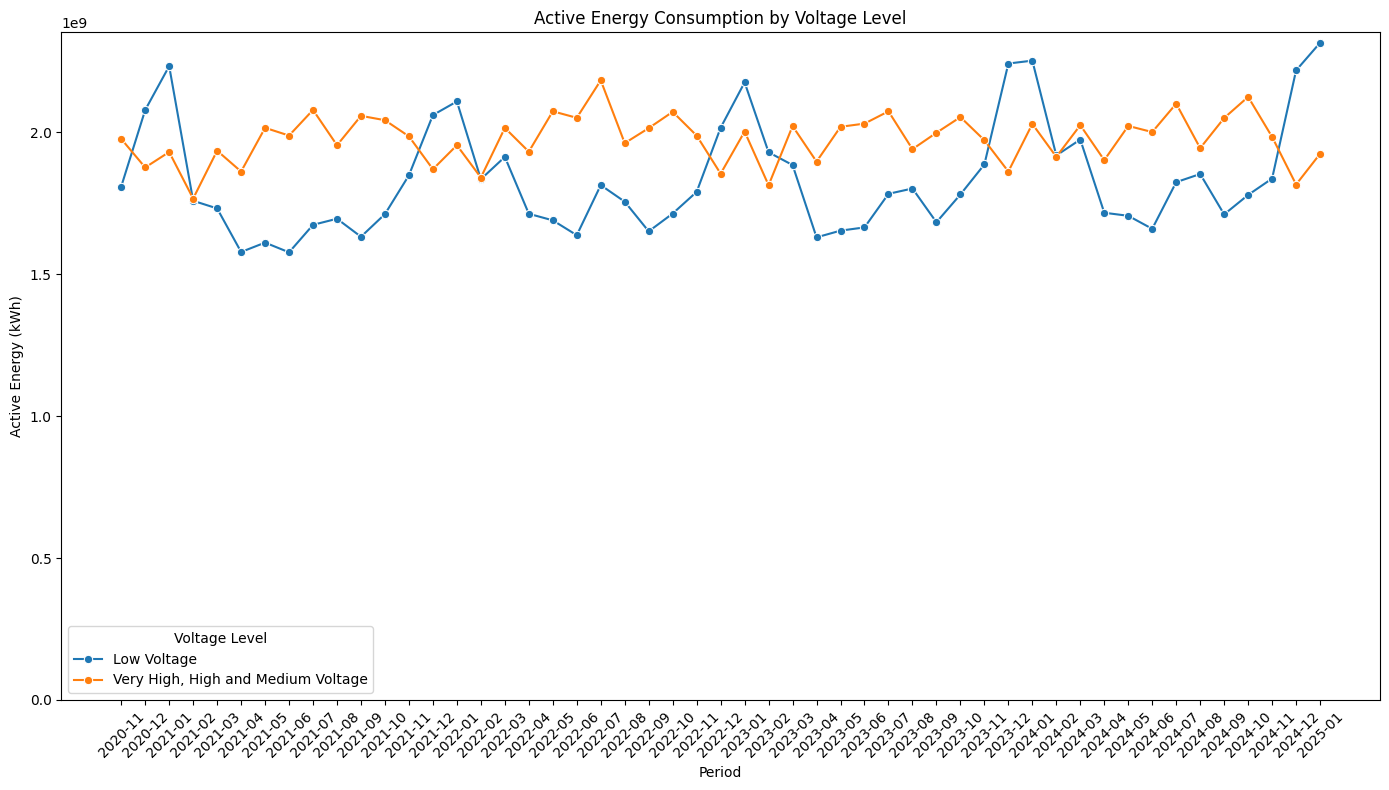

In [20]:
sector_summary = (
    new_df.groupby(['periodo', 'nivel_de_tensao'])['energia_ativa_kwh']
    .sum()
    .reset_index()
)

sector_summary['periodo_str'] = sector_summary['periodo'].astype(str)

# Map Portuguese voltage levels to English
voltage_level_map = {
    'Baixa Tensão': 'Low Voltage',
    'Muito Alta, Alta e Média Tensões': 'Very High, High and Medium Voltage'
}
sector_summary['nivel_de_tensao'] = sector_summary['nivel_de_tensao'].map(voltage_level_map)


plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_summary, x='periodo_str', y='energia_ativa_kwh', hue='nivel_de_tensao', marker='o')
plt.xticks(rotation=45)
plt.title('Active Energy Consumption by Voltage Level')
plt.xlabel('Period')
plt.ylabel('Active Energy (kWh)')
plt.legend(title='Voltage Level')
plt.ylim(0, None)
plt.tight_layout()
plt.show()

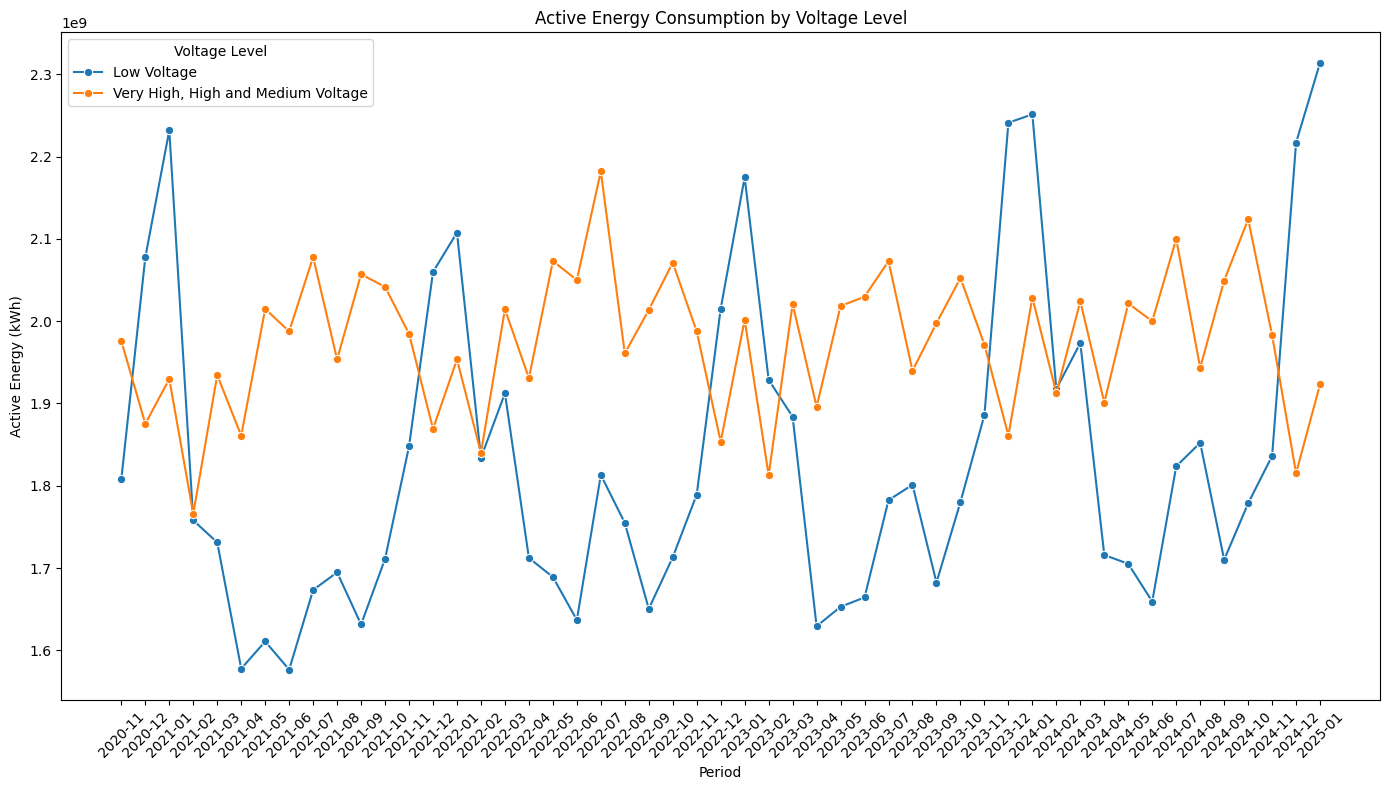

In [21]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_summary, x='periodo_str', y='energia_ativa_kwh', hue='nivel_de_tensao', marker='o')
plt.xticks(rotation=45)
plt.title('Active Energy Consumption by Voltage Level')
plt.xlabel('Period')
plt.ylabel('Active Energy (kWh)')
plt.legend(title='Voltage Level')
plt.tight_layout()
plt.show()

In [22]:
gdf_sector = (
    new_df.groupby(['periodo', 'coddistrito', 'nivel_de_tensao'])['energia_ativa_kwh']
    .sum()
    .reset_index()
    .merge(dissolved_distritos.reset_index(), on='coddistrito')
)
gdf_sector['periodo'] = pd.to_datetime(gdf_sector['periodo'].astype(str))
gdf_sector = gpd.GeoDataFrame(gdf_sector, geometry='geometry')


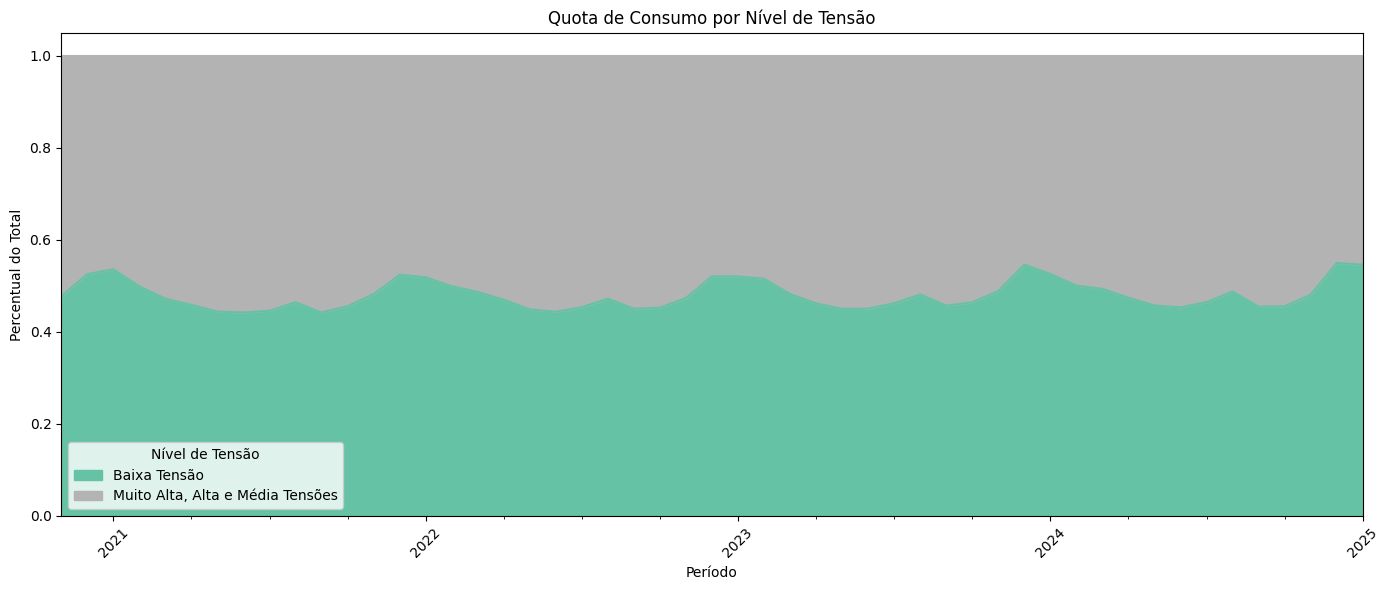

In [23]:
total_by_month = new_df.groupby(['periodo', 'nivel_de_tensao'])['energia_ativa_kwh'].sum().reset_index()
pivot_df = total_by_month.pivot(index='periodo', columns='nivel_de_tensao', values='energia_ativa_kwh')
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)  # normalize per row

pivot_df.plot.area(figsize=(14, 6), colormap='Set2')
plt.title("Quota de Consumo por Nível de Tensão")
plt.ylabel("Percentual do Total")
plt.xlabel("Período")
plt.xticks(rotation=45)
plt.legend(title='Nível de Tensão')
plt.tight_layout()
plt.show()


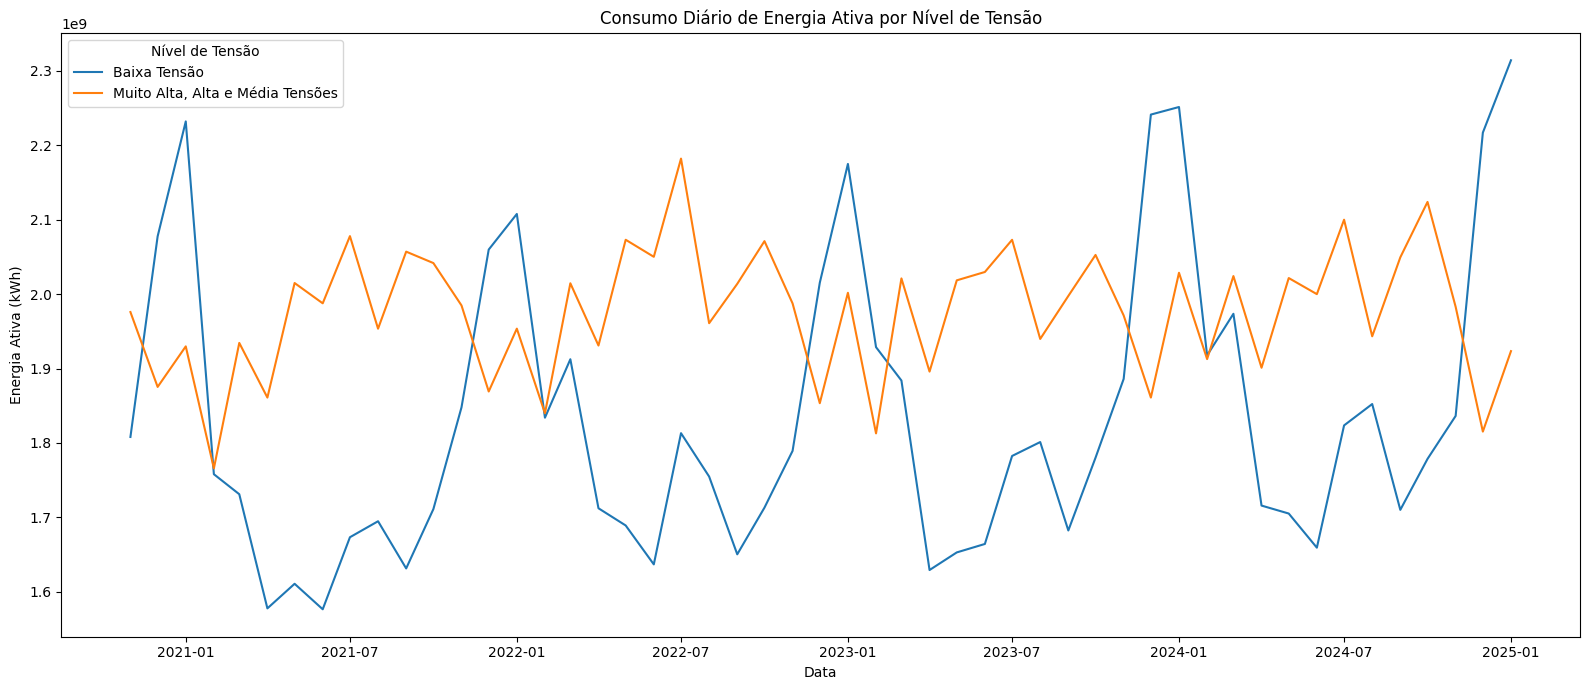

In [24]:
# Ensure datetime format
new_df['data'] = pd.to_datetime(new_df['data'], errors='coerce')

# Group by day and tension level
daily_tension = (
    new_df.groupby(['data', 'nivel_de_tensao'])['energia_ativa_kwh']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(16, 7))
sns.lineplot(data=daily_tension, x='data', y='energia_ativa_kwh', hue='nivel_de_tensao')
plt.title('Consumo Diário de Energia Ativa por Nível de Tensão')
plt.xlabel('Data')
plt.ylabel('Energia Ativa (kWh)')
plt.legend(title='Nível de Tensão')
plt.tight_layout()
plt.show()


In [25]:
excel_df_stations = pd.read_excel(
    '/content/drive/MyDrive/Colab Notebooks/tese/Amostras/Dados_diarios_T_Vento_Prec_capitaisDistrito_2013 a 2023.xlsx',
    sheet_name=0,
    skiprows=12,  # starts from the station data
    nrows=18,     # adjust if needed
    usecols="B:G",  # useful columns only
    header=None
)

# Optional: name the columns
excel_df_stations.columns = ['Station_ID', 'Station_Name', 'Unused', 'Altitude_m', 'Lat_dec', 'Lon_dec']

# Drop 'Unused' if you don't need it
excel_df_stations.drop(columns='Unused', inplace=True)

excel_df_stations.head()

Station_ID              Station_Name  Altitude_m  Lat_dec  Lon_dec
0     1200551  Viana do Castelo / Chafé      47.300  41.6488  -8.8047
1     1210622           Braga / Merelim      68.351  41.5758  -8.4511
2     1200567     Vila Real / Aeródromo     561.500  41.2742  -7.7171
3     1200575                  Bragança     690.700  41.8038  -6.7428
4     1200545     Porto / Pedras Rubras      67.700  41.2322  -8.6791

In [26]:
station_district_map = {
    1200551: ('Viana do Castelo', '16'),
    1210622: ('Braga', '03'),
    1200567: ('Vila Real', '17'),
    1200575: ('Bragança', '04'),
    1200545: ('Porto', '13'),
    1210702: ('Aveiro', '01'),
    1200560: ('Viseu', '18'),
    1210683: ('Guarda', '09'),
    1200548: ('Coimbra', '06'),
    1200570: ('Castelo Branco', '05'),
    1210718: ('Leiria', '10'),
    1210734: ('Santarém', '14'),
    1200571: ('Portalegre', '12'),
    1200579: ('Lisboa', '11'),
    1210770: ('Setúbal', '15'),
    1200558: ('Évora', '07'),
    1200562: ('Beja', '02'),
    1200554: ('Faro', '08'),
}

# Create district columns from the map
excel_df_stations['District_Name'] = excel_df_stations['Station_ID'].map(lambda x: station_district_map[x][0])
excel_df_stations['District_Code'] = excel_df_stations['Station_ID'].map(lambda x: station_district_map[x][1])

excel_df_stations

Station_ID                           Station_Name  Altitude_m  Lat_dec  \
0      1200551               Viana do Castelo / Chafé      47.300  41.6488   
1      1210622                        Braga / Merelim      68.351  41.5758   
2      1200567                  Vila Real / Aeródromo     561.500  41.2742   
3      1200575                               Bragança     690.700  41.8038   
4      1200545                  Porto / Pedras Rubras      67.700  41.2322   
5      1210702                  Aveiro / Universidade       3.600  40.6353   
6      1200560             Viseu / Centro Coordenador     644.400  40.7148   
7      1210683                                 Guarda    1001.000  40.5286   
8      1200548         Coimbra / Cernache / Aeródromo     170.800  40.1576   
9      1200570                        Castelo Branco      386.000  39.8394   
10     1210718                                 Leiria      42.500  39.7806   
11     1210734  Santarém / Fonte Boa  Est. Zootécnica      71.911  39.2013   
12     1200571                             Portalegre     596.600  39.2942   
13     1200579                 Lisboa / Gago Coutinho     103.900  38.7662   
14     1210770      Setúbal / Estação de Fruticultura      18.700  38.5485   
15     1200558                      Évora / Aeródromo     247.600  38.5365   
16     1200562                                   Beja     246.000  38.0257   
17     1200554                       Faro / Aeroporto       5.000  37.0166   

    Lon_dec     District_Name District_Code  
0   -8.8047  Viana do Castelo            16  
1   -8.4511             Braga            03  
2   -7.7171         Vila Real            17  
3   -6.7428          Bragança            04  
4   -8.6791             Porto            13  
5   -8.6598            Aveiro            01  
6   -7.8959             Viseu            18  
7   -7.2787            Guarda            09  
8   -8.4685           Coimbra            06  
9   -7.4787    Castelo Branco            05  
10  -8.8209            Leiria            10  
11  -8.7368          Santarém            14  
12  -7.4212        Portalegre            12  
13  -9.1275            Lisboa            11  
14  -8.8908           Setúbal            15  
15  -7.8880             Évora            07  
16  -7.8673              Beja            02  
17  -7.9719              Faro            08

In [27]:
geometry = [Point(xy) for xy in zip(excel_df_stations['Lon_dec'], excel_df_stations['Lat_dec'])]

stations_gdf = gpd.GeoDataFrame(excel_df_stations, geometry=geometry, crs="EPSG:4326")
stations_gdf = stations_gdf.to_crs(shapefile.crs)

In [28]:
# fig, ax = plt.subplots(figsize=(10, 10))

# # Plot the shapefile
# shapefile_distrito.plot(ax=ax, color='lightgrey', edgecolor='black')

# # Plot the stations
# stations_gdf.plot(ax=ax, color='red', markersize=50, label='Stations')

# # Add labels if you want (optional)
# for x, y, label in zip(stations_gdf.geometry.x, stations_gdf.geometry.y, stations_gdf['Station_Name']):
#     ax.text(x, y, label, fontsize=8, ha='right')

# plt.title("Weather Stations in Portugal")
# plt.legend()
# plt.axis("off")
# plt.tight_layout()
# plt.show()


In [29]:
excel_df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tese/Amostras/Dados_diarios_T_Vento_Prec_capitaisDistrito_2013 a 2023.xlsx', sheet_name=1)
# excel_df1

In [30]:
melted_df = excel_df1.melt(
    id_vars=["ANO", "MES", "DIA"],
    var_name="Station_ID",
    value_name="Temperature"
)

melted_df.rename(columns={"ANO": "year", "MES": "month", "DIA": "day"}, inplace=True)
melted_df["Date"] = pd.to_datetime(melted_df[["year", "month", "day"]])

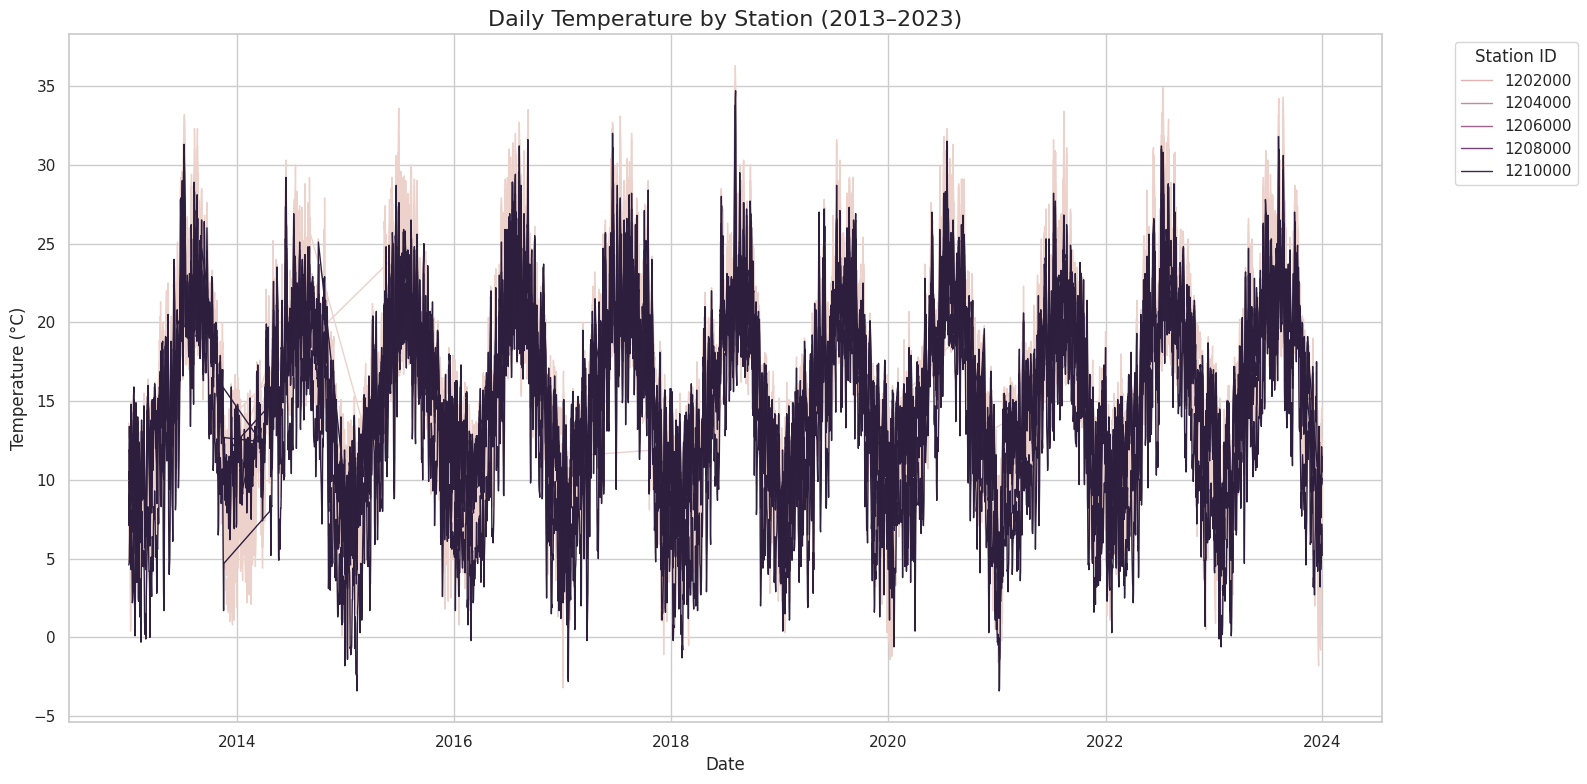

In [31]:
sns.set(style="whitegrid")

# Filter out missing values
filtered_df = melted_df[melted_df["Temperature"] != -990.0]

# Plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered_df, x="Date", y="Temperature", hue="Station_ID", linewidth=1)

plt.title("Daily Temperature by Station (2013–2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Station ID")
plt.tight_layout()
plt.show()

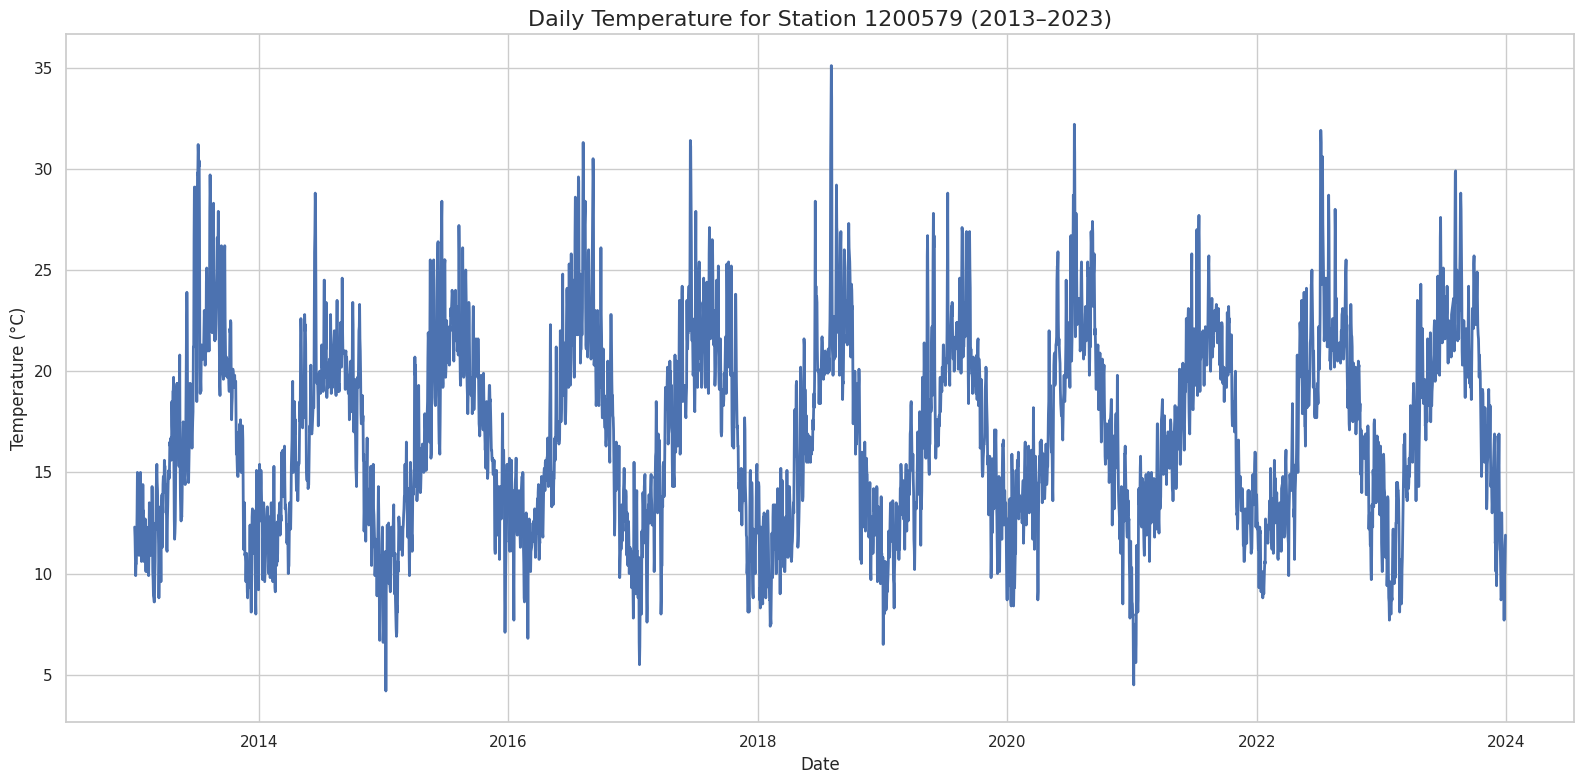

In [32]:
sns.set(style="whitegrid")

station_id = 1200579

specific_station_df = melted_df[melted_df["Station_ID"] == station_id]

specific_station_df = specific_station_df[specific_station_df["Temperature"] != -990.0]

plt.figure(figsize=(16, 8))
sns.lineplot(data=specific_station_df, x="Date", y="Temperature", linewidth=2, color='b')

plt.title(f"Daily Temperature for Station {station_id} (2013–2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


In [33]:
station_avg_temp = (
    melted_df[melted_df["Temperature"] != -990.0]
    .groupby("Station_ID")["Temperature"]
    .mean()
    .reset_index()
)
station_avg_temp.rename(columns={"Temperature": "Avg_Temp"}, inplace=True)

In [34]:
stations_with_temp = excel_df_stations.merge(station_avg_temp, on="Station_ID")

# 7. Create GeoDataFrame
stations_with_temp_gdf = gpd.GeoDataFrame(
    stations_with_temp,
    geometry=gpd.points_from_xy(stations_with_temp["Lon_dec"], stations_with_temp["Lat_dec"]),
    crs="EPSG:4326"
)

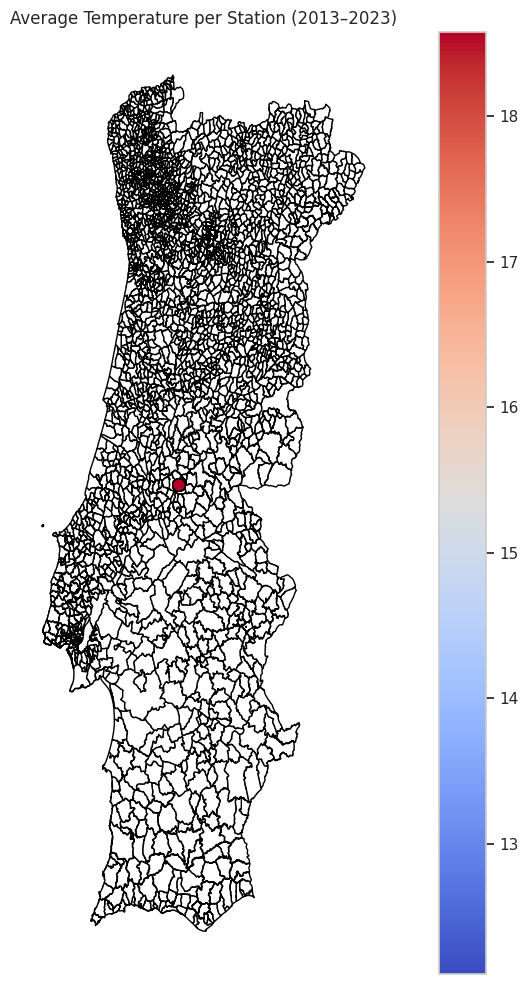

In [35]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot base map
shapefile.plot(ax=ax, color="white", edgecolor="black")

# Plot station points colored by average temperature
stations_with_temp_gdf.plot(
    ax=ax,
    column="Avg_Temp",
    cmap="coolwarm",
    legend=True,
    markersize=80,
    edgecolor="black"
)

plt.title("Average Temperature per Station (2013–2023)")
plt.axis("off")
plt.tight_layout()
plt.show()

In [36]:
excel_df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tese/CapitaisDistrito_Valores_dia_Tn_Tx_Prec_RG.xlsx', sheet_name=4)
excel_df2

ANO  MÊS  DIA  Viana do Castelo   Braga  Vila Real  Bragança   Porto  \
0     2010    1    1            -990.0  7709.7     3627.6    3996.4  -990.0   
1     2010    1    2            -990.0  3162.4     2011.2    1555.1  3655.6   
2     2010    1    3            -990.0  5527.5     3619.6    1927.2  -990.0   
3     2010    1    4            -990.0  1630.2     1594.4     723.8  -990.0   
4     2010    1    5            -990.0  -990.0     3210.0    3709.7  7354.1   
...    ...  ...  ...               ...     ...        ...       ...     ...   
5474  2024   12   27            7883.5  8005.5     1935.5    3075.4  7951.5   
5475  2024   12   28            7213.6  7805.9     1520.8    2301.3  7777.2   
5476  2024   12   29            8104.8  8428.4     1030.5    1365.2  8046.0   
5477  2024   12   30            7937.9  8166.7     1352.6    1625.2  8062.0   
5478  2024   12   31            8138.9  8546.5     1477.4    2262.7  8260.5   

      Aveiro   Viseu  ...  Coimbra  Castelo Branco  Leiria  Santarém  \
0     6323.3  5394.4  ...   7107.6          6966.4  -990.0    3705.0   
1     2984.7  2752.7  ...   4225.7          2920.6  4267.9    4184.7   
2     3638.0  2289.0  ...   3746.5           730.9  -990.0    2296.0   
3     2813.1  1901.9  ...   2383.1          2796.3  -990.0    2836.2   
4     6120.9  4260.5  ...   3170.6          6261.7  -990.0    3198.4   
...      ...     ...  ...      ...             ...     ...       ...   
5474  8322.7    69.5  ...   8870.3          9160.0  9474.1   10509.7   
5475  8223.2    76.6  ...   8784.7          9374.7  9326.8   10656.8   
5476  8333.0    81.1  ...   9040.6          9431.7  9475.0   10515.7   
5477  8619.6    78.0  ...   8887.7          8054.0  9593.3   10702.5   
5478  8634.5    82.7  ...   7781.6          9049.3  9052.5   10699.9   

      Portalegre  Lisboa  Setúbal   Évora     Beja     Faro  
0         4679.6  7037.9   9379.1  7952.1   9998.2  10747.1  
1         4556.7  3895.4   3231.8  4715.6   5336.5   1899.4  
2          562.4  2881.0   2040.7  1267.2   1675.3   1849.5  
3         2704.4  3524.9   3687.0  3047.9   -990.0   5787.7  
4         3489.9  4660.4   -990.0  4252.0   6242.7   7838.8  
...          ...     ...      ...     ...      ...      ...  
5474      4201.9  9411.2  10370.6  9493.9  10045.1   9276.1  
5475      4733.7  9468.1  10274.6  9643.0  10422.1  10797.4  
5476      4954.1  9777.5  10841.1  9965.4  10627.3  10982.0  
5477      4904.1  9740.9  10804.0  9937.9  10525.9  10630.2  
5478      5051.6  8557.3  10119.7  8041.9   9823.3   9251.6  

[5479 rows x 21 columns]

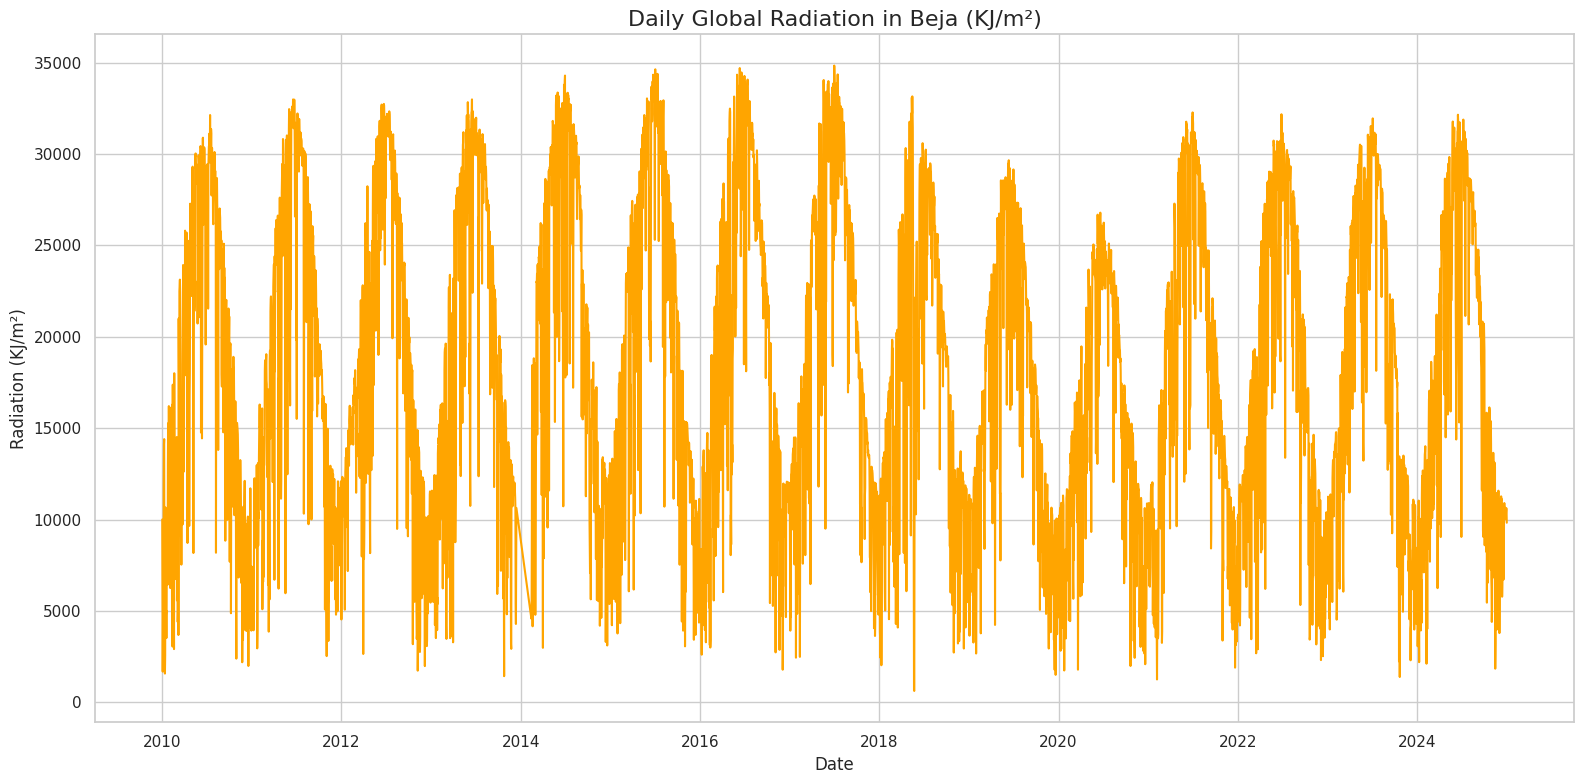

In [37]:
# Rename date columns to lowercase
excel_df2.rename(columns={"ANO": "year", "MÊS": "month", "DIA": "day"}, inplace=True)

# Create datetime column
excel_df2["Date"] = pd.to_datetime(excel_df2[["year", "month", "day"]])

# Choose a specific city to plot
city = "Beja"  # Change to any city name from your columns

# Filter and clean data
city_df = excel_df2[["Date", city]].copy()
city_df = city_df[city_df[city] != -990.0]  # Remove missing values

# Plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=city_df, x="Date", y=city, color='orange', linewidth=1.5)

plt.title(f"Daily Global Radiation in {city} (KJ/m²)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Radiation (KJ/m²)")
plt.tight_layout()
plt.show()

In [38]:
import plotly.express as px

# Filter & clean again if needed
city_df = excel_df2[["Date", city]].copy()
city_df = city_df[city_df[city] != -990.0]

# Interactive plot
fig = px.line(city_df, x="Date", y=city, title=f"Daily Global Radiation in {city} (KJ/m²)")
fig.update_layout(yaxis_title="Radiation (KJ/m²)", xaxis_title="Date")
fig.show()


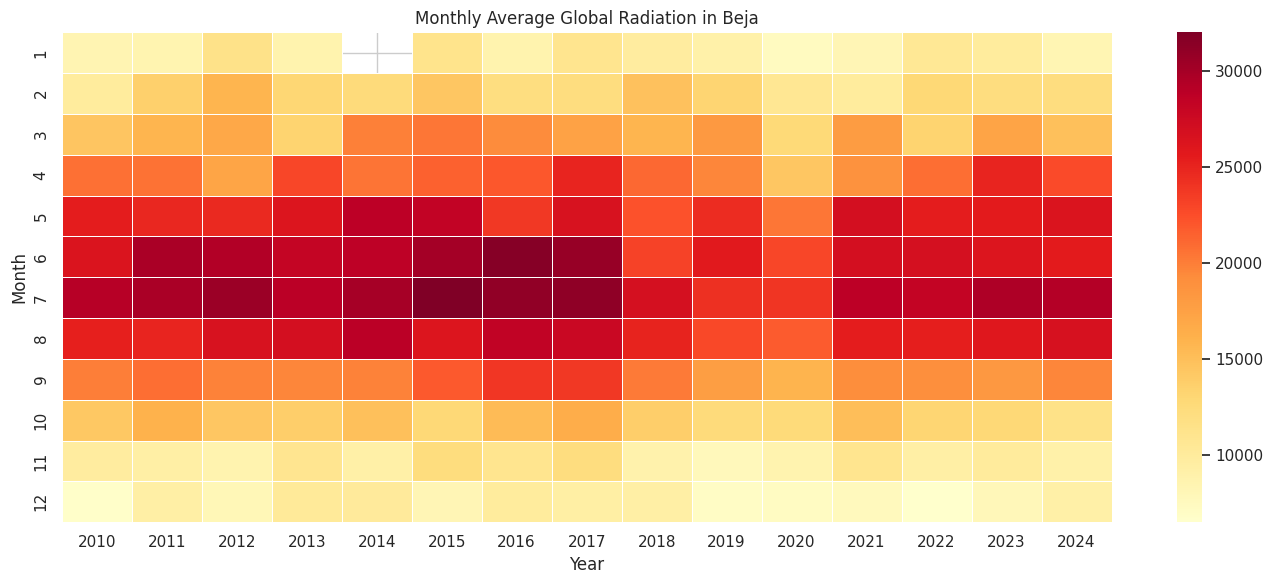

In [39]:
# Prepare data
city_df["year"] = city_df["Date"].dt.year
city_df["month"] = city_df["Date"].dt.month

pivot = city_df.pivot_table(index="month", columns="year", values=city)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap="YlOrRd", linewidths=0.5, annot=False)

plt.title(f"Monthly Average Global Radiation in {city}")
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


In [40]:
# Melt to long format
melted = excel_df2.melt(
    id_vars=["year", "month", "day"],
    var_name="City",
    value_name="Radiation"
)

# Create date
melted["Date"] = pd.to_datetime(melted[["year", "month", "day"]])
melted = melted[melted["Radiation"] != -990.0]

# Optional: sample only some cities
cities_to_plot = ["Lisboa", "Porto", "Faro"]
melted = melted[melted["City"].isin(cities_to_plot)]

# Plot
fig = px.line(
    melted,
    x="Date",
    y="Radiation",
    color="City",
    title="Daily Global Radiation by City",
    animation_frame="year",
    range_y=[0, melted["Radiation"].max()]
)
fig.update_layout(yaxis_title="KJ/m²", xaxis_title="Date")
fig.show()


/tmp/ipython-input-1207997980.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




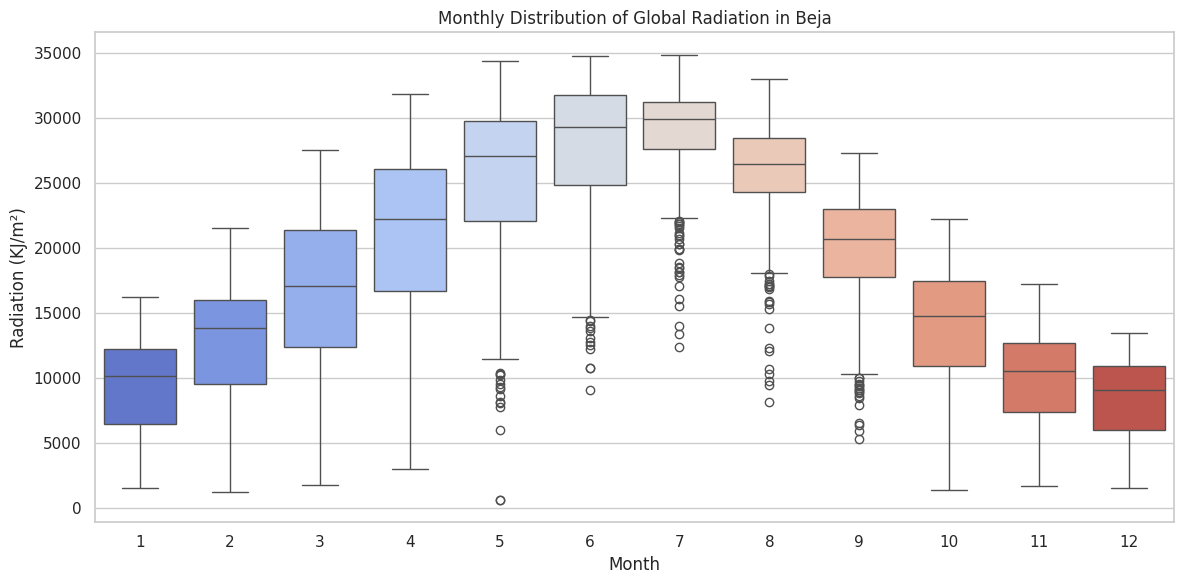

In [41]:
city_df["month"] = city_df["Date"].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=city_df, x="month", y=city, palette="coolwarm")

plt.title(f"Monthly Distribution of Global Radiation in {city}")
plt.xlabel("Month")
plt.ylabel("Radiation (KJ/m²)")
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Load data and clean
excel_df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tese/CapitaisDistrito_Valores_dia_Tn_Tx_Prec_RG.xlsx', sheet_name=4)
excel_df2 = excel_df2.rename(columns={"ANO": "year", "MÊS": "month", "DIA": "day"})

# Create date column
excel_df2["Date"] = pd.to_datetime(excel_df2[["year", "month", "day"]])

# Melt to long format
radiation_long = excel_df2.melt(
    id_vars=["year", "month", "day", "Date"],
    var_name="City",
    value_name="Radiation"
)

# Filter out missing values
radiation_long = radiation_long[radiation_long["Radiation"] != -990.0]

# Calculate average radiation per city
city_avg_rad = radiation_long.groupby("City")["Radiation"].mean().reset_index()
city_avg_rad.rename(columns={"Radiation": "Avg_Radiation"}, inplace=True)


In [43]:

city_coords = {
    "Viana do Castelo": (41.6946, -8.8302),
    "Braga": (41.5454, -8.4265),
    "Vila Real": (41.3006, -7.7441),
    "Bragança": (41.8066, -6.7567),
    "Porto": (41.1579, -8.6291),
    "Aveiro": (40.6405, -8.6538),
    "Viseu": (40.6610, -7.9097),
    "Guarda": (40.5373, -7.2676),
    "Coimbra": (40.2033, -8.4103),
    "Castelo Branco": (39.8222, -7.4902),
    "Leiria": (39.7436, -8.8071),
    "Santarém": (39.2362, -8.6866),
    "Portalegre": (39.2921, -7.4283),
    "Lisboa": (38.7169, -9.1399),
    "Setúbal": (38.5244, -8.8882),
    "Évora": (38.5710, -7.9097),
    "Beja": (38.0154, -7.8632),
    "Faro": (37.0194, -7.9304)
}

# Convert to DataFrame
coords_df = pd.DataFrame(city_coords).T.reset_index()
coords_df.columns = ["City", "Latitude", "Longitude"]

# Merge with radiation
map_df = city_avg_rad.merge(coords_df, on="City")


In [44]:
# import folium
# from folium.plugins import MarkerCluster

# # Create base map centered in Portugal
# m = folium.Map(location=[39.5, -8.0], zoom_start=7)

# # Marker cluster
# marker_cluster = MarkerCluster().add_to(m)

# # Add city points
# for _, row in map_df.iterrows():
#     folium.CircleMarker(
#         location=[row["Latitude"], row["Longitude"]],
#         radius=8,
#         color="black",
#         fill=True,
#         fill_color=plt.cm.YlOrRd((row["Avg_Radiation"] - map_df["Avg_Radiation"].min()) /
#                                  (map_df["Avg_Radiation"].max() - map_df["Avg_Radiation"].min())),
#         fill_opacity=0.8,
#         popup=f"{row['City']}: {row['Avg_Radiation']:.1f} KJ/m²",
#     ).add_to(marker_cluster)

# # Show map
# m


In [45]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from shapely.geometry import Point

# # Create geometry from lat/lon
# geometry = [Point(xy) for xy in zip(excel_df_stations['Lon_dec'], excel_df_stations['Lat_dec'])]
# stations_gdf = gpd.GeoDataFrame(excel_df_stations, geometry=geometry, crs="EPSG:4326")

# # Convert to the same CRS as the shapefile
# stations_gdf = stations_gdf.to_crs(shapefile.crs)

# # Plot
# fig, ax = plt.subplots(figsize=(10, 10))

# # Plot the base map (districts)
# shapefile_distrito.plot(ax=ax, color='lightgrey', edgecolor='black')

# # Plot the stations
# stations_gdf.plot(ax=ax, color='red', markersize=50, label='Stations')

# # Add labels for stations
# for x, y, label in zip(stations_gdf.geometry.x, stations_gdf.geometry.y, stations_gdf['Station_Name']):
#     ax.text(x, y, label, fontsize=8, ha='right')

# plt.title("Weather Stations in Portugal")
# plt.legend()
# plt.axis("off")
# plt.tight_layout()
# plt.show()


In [46]:
# # Step 1: Copy the original shapefile (concelhos)
# shapefile_distrito = shapefile.copy()

# # Step 2: Extract the 2-digit district code from 'Dicofre'
# shapefile_distrito['coddistrito'] = shapefile_distrito['Dicofre'].str[:2]

# # Step 3: Dissolve polygons by district code
# dissolved_distritos = shapefile_distrito.dissolve(by='coddistrito')

# # Step 4: Plot the districts
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))
# dissolved_distritos.plot(ax=ax, edgecolor='black', color='lightblue')

# # Optional: add district code labels
# dissolved_distritos['coords'] = dissolved_distritos['geometry'].centroid
# for idx, row in dissolved_distritos.iterrows():
#     plt.annotate(text=idx, xy=(row['coords'].x, row['coords'].y),
#                  ha='center', fontsize=8)

# plt.title("Distritos de Portugal")
# plt.axis("off")
# plt.tight_layout()
# plt.show()


In [47]:
# First make sure Date is datetime
excel_df2['Date'] = pd.to_datetime(excel_df2['Date'])

# Add trimestre column
excel_df2['trimestre'] = excel_df2['Date'].dt.to_period('Q')

# Melt from wide to long, excluding year, month, and day
df_long = excel_df2.melt(id_vars=['Date', 'trimestre'],
                         value_vars=[col for col in excel_df2.columns if col not in ['year', 'month', 'day', 'Date', 'trimestre']],
                         var_name='distrito',
                         value_name='radiacao')


# Remove invalid values (e.g., -990.0 is probably missing data)
df_long = df_long[df_long['radiacao'] > 0]
# Group and average
avg_radiacao = df_long.groupby(['trimestre', 'distrito'])['radiacao'].mean().reset_index()

In [48]:
excel_df2

year  month  day  Viana do Castelo   Braga  Vila Real  Bragança   Porto  \
0     2010      1    1            -990.0  7709.7     3627.6    3996.4  -990.0   
1     2010      1    2            -990.0  3162.4     2011.2    1555.1  3655.6   
2     2010      1    3            -990.0  5527.5     3619.6    1927.2  -990.0   
3     2010      1    4            -990.0  1630.2     1594.4     723.8  -990.0   
4     2010      1    5            -990.0  -990.0     3210.0    3709.7  7354.1   
...    ...    ...  ...               ...     ...        ...       ...     ...   
5474  2024     12   27            7883.5  8005.5     1935.5    3075.4  7951.5   
5475  2024     12   28            7213.6  7805.9     1520.8    2301.3  7777.2   
5476  2024     12   29            8104.8  8428.4     1030.5    1365.2  8046.0   
5477  2024     12   30            7937.9  8166.7     1352.6    1625.2  8062.0   
5478  2024     12   31            8138.9  8546.5     1477.4    2262.7  8260.5   

      Aveiro   Viseu  ...  Leiria  Santarém  Portalegre  Lisboa  Setúbal  \
0     6323.3  5394.4  ...  -990.0    3705.0      4679.6  7037.9   9379.1   
1     2984.7  2752.7  ...  4267.9    4184.7      4556.7  3895.4   3231.8   
2     3638.0  2289.0  ...  -990.0    2296.0       562.4  2881.0   2040.7   
3     2813.1  1901.9  ...  -990.0    2836.2      2704.4  3524.9   3687.0   
4     6120.9  4260.5  ...  -990.0    3198.4      3489.9  4660.4   -990.0   
...      ...     ...  ...     ...       ...         ...     ...      ...   
5474  8322.7    69.5  ...  9474.1   10509.7      4201.9  9411.2  10370.6   
5475  8223.2    76.6  ...  9326.8   10656.8      4733.7  9468.1  10274.6   
5476  8333.0    81.1  ...  9475.0   10515.7      4954.1  9777.5  10841.1   
5477  8619.6    78.0  ...  9593.3   10702.5      4904.1  9740.9  10804.0   
5478  8634.5    82.7  ...  9052.5   10699.9      5051.6  8557.3  10119.7   

       Évora     Beja     Faro       Date  trimestre  
0     7952.1   9998.2  10747.1 2010-01-01     2010Q1  
1     4715.6   5336.5   1899.4 2010-01-02     2010Q1  
2     1267.2   1675.3   1849.5 2010-01-03     2010Q1  
3     3047.9   -990.0   5787.7 2010-01-04     2010Q1  
4     4252.0   6242.7   7838.8 2010-01-05     2010Q1  
...      ...      ...      ...        ...        ...  
5474  9493.9  10045.1   9276.1 2024-12-27     2024Q4  
5475  9643.0  10422.1  10797.4 2024-12-28     2024Q4  
5476  9965.4  10627.3  10982.0 2024-12-29     2024Q4  
5477  9937.9  10525.9  10630.2 2024-12-30     2024Q4  
5478  8041.9   9823.3   9251.6 2024-12-31     2024Q4  

[5479 rows x 23 columns]

In [49]:
avg_radiacao

trimestre          distrito      radiacao
0      2010Q1            Aveiro   9553.591765
1      2010Q1              Beja  11069.123256
2      2010Q1             Braga   9683.723810
3      2010Q1          Bragança   9237.337931
4      2010Q1    Castelo Branco   9926.110000
..        ...               ...           ...
929    2024Q4           Setúbal   9965.969231
930    2024Q4  Viana do Castelo   7328.096739
931    2024Q4         Vila Real   6315.357778
932    2024Q4             Viseu     72.503226
933    2024Q4             Évora   9175.323596

[934 rows x 3 columns]

In [50]:
dissolved_distritos

geometry Dicofre  \
coddistrito                                                              
01           POLYGON ((-42367.01 87438.409, -42366.591 8742...  010126   
02           POLYGON ((8557.812 -257575.057, 8530.312 -2575...  020206   
03           POLYGON ((-37884.652 186463.881, -37948.151 18...  0302FA   
04           POLYGON ((83518.431 166006.237, 83459.682 1659...  040532   
05           POLYGON ((36745.61 -3546.487, 36731.431 -3562....  051003   
06           POLYGON ((-55822.001 40696.006, -55839.14 4066...  061401   
07           POLYGON ((17183.447 -151703.224, 17161.787 -15...  070908   
08           MULTIPOLYGON (((-69685.641 -294253.284, -69681...  080106   
09           MULTIPOLYGON (((35744.382 65384.798, 35708.144...  090229   
10           MULTIPOLYGON (((-85423.362 -45714.016, -85407....  101616   
11           MULTIPOLYGON (((-116879.481 -103761.873, -1168...  110507   
12           POLYGON ((33932.172 -83046.081, 33945.585 -830...  121211   
13           POLYGON ((-40403.908 150450.249, -40440.078 15...  131218   
14           POLYGON ((-49605.287 -91992.891, -49641.025 -9...  141920   
15           MULTIPOLYGON (((-92870.137 -139216.504, -92865...  151302   
16           MULTIPOLYGON (((-54104.541 216070.182, -54137....  160923   
17           POLYGON ((20831.072 163804.62, 20820.682 16377...  171316   
18           POLYGON ((-8384.201 73634.257, -8384.64 73618....  180622   

                                                     Freguesia  \
coddistrito                                                      
01           União das freguesias de Trofa, Segadães e Lama...   
02                                                 São Barnabé   
03           União das freguesias de Milhazes, Vilar de Fig...   
04                                               Vale Benfeito   
05                                                 Vila de Rei   
06                                                    Cumeeira   
07                                                   Vera Cruz   
08                                   Albufeira e Olhos de Água   
09                                               Vilar Formoso   
10                   União das freguesias de Arrimal e Mendiga   
11                 União das freguesias de Carcavelos e Parede   
12              União das freguesias de Arez e Amieira do Tejo   
13           União das freguesias de Lordelo do Ouro e Mass...   
14           União das freguesias de Torres Novas (Santa Ma...   
15                                                  Porto Covo   
16                                          São Romão de Neiva   
17                                              Vreia de Jales   
18           União das freguesias de Tavares (Chãs, Várzea ...   

                         Concelho          Distrito              TAA  \
coddistrito                                                            
01                         ÁGUEDA            AVEIRO   ÁREA PRINCIPAL   
02                      ALMODÔVAR              BEJA   ÁREA PRINCIPAL   
03                       BARCELOS             BRAGA   ÁREA PRINCIPAL   
04           MACEDO DE CAVALEIROS          BRAGANÇA   ÁREA PRINCIPAL   
05                    VILA DE REI    CASTELO BRANCO   ÁREA PRINCIPAL   
06                         PENELA           COIMBRA   ÁREA PRINCIPAL   
07                         PORTEL             ÉVORA   ÁREA PRINCIPAL   
08                      ALBUFEIRA              FARO  ÁREA SECUNDÁRIA   
09                        ALMEIDA            GUARDA   ÁREA PRINCIPAL   
10                   PORTO DE MÓS            LEIRIA   ÁREA PRINCIPAL   
11                        CASCAIS            LISBOA   ÁREA PRINCIPAL   
12                           NISA        PORTALEGRE   ÁREA PRINCIPAL   
13                          PORTO             PORTO   ÁREA PRINCIPAL   
14                   TORRES NOVAS          SANTARÉM   ÁREA PRINCIPAL   
15                          SINES           SETÚBAL  ÁREA SECUNDÁRIA   
16               VIANA DO CA